In [1]:
'''Assignment 3'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
api_key = '6a4ce9b006d42c5fb30191750fb5b71f'

In [4]:
import requests

# Set the API endpoint
url = 'http://api.openweathermap.org/data/2.5/forecast'

cities = ['Nagpur','Chennai' , 'Bombay', 'New Delhi', 'Pune']

def get_weather_forecast(city):
    # Set the parameters
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'
    }

    # Make the GET request
    response = requests.get(url, params=params)
    # Check the status code
    if response.status_code == 200:
        # Convert the response to JSON
        data = response.json()
        
        forecasted_list = data['list']
        dates = []
        temperatures = []
        humidities = []
        pressures = []

        for list in forecasted_list:
            dates.append(list['dt_txt'])
            temperatures.append(list['main']['temp'])
            humidities.append(list['main']['humidity'])
            pressures.append(list['main']['pressure'])

        df = pd.DataFrame({
            'date': dates,
            'temperature':temperatures,
            'humidity':humidities,
            'pressure':pressures,
            'city':city
        })

        df.date = pd.to_datetime(df.date)

        return df
    else:
        print(f"Error: {response.status_code} - {response.text}")


all_data = pd.concat([get_weather_forecast(city) for city in cities])
all_data.head(10)

,date,temperature,humidity,pressure,city
0,2024-06-19 00:00:00,27.13,84,1004,Chennai
1,2024-06-19 03:00:00,29.37,72,1005,Chennai
2,2024-06-19 06:00:00,34.04,49,1005,Chennai
3,2024-06-19 09:00:00,34.27,48,1002,Chennai
4,2024-06-19 12:00:00,31.50,64,1002,Chennai
5,2024-06-19 15:00:00,30.24,69,1004,Chennai
6,2024-06-19 18:00:00,29.74,66,1005,Chennai
7,2024-06-19 21:00:00,29.07,71,1003,Chennai
8,2024-06-20 00:00:00,29.16,69,1004,Chennai
9,2024-06-20 03:00:00,31.79,53,1006,Chennai


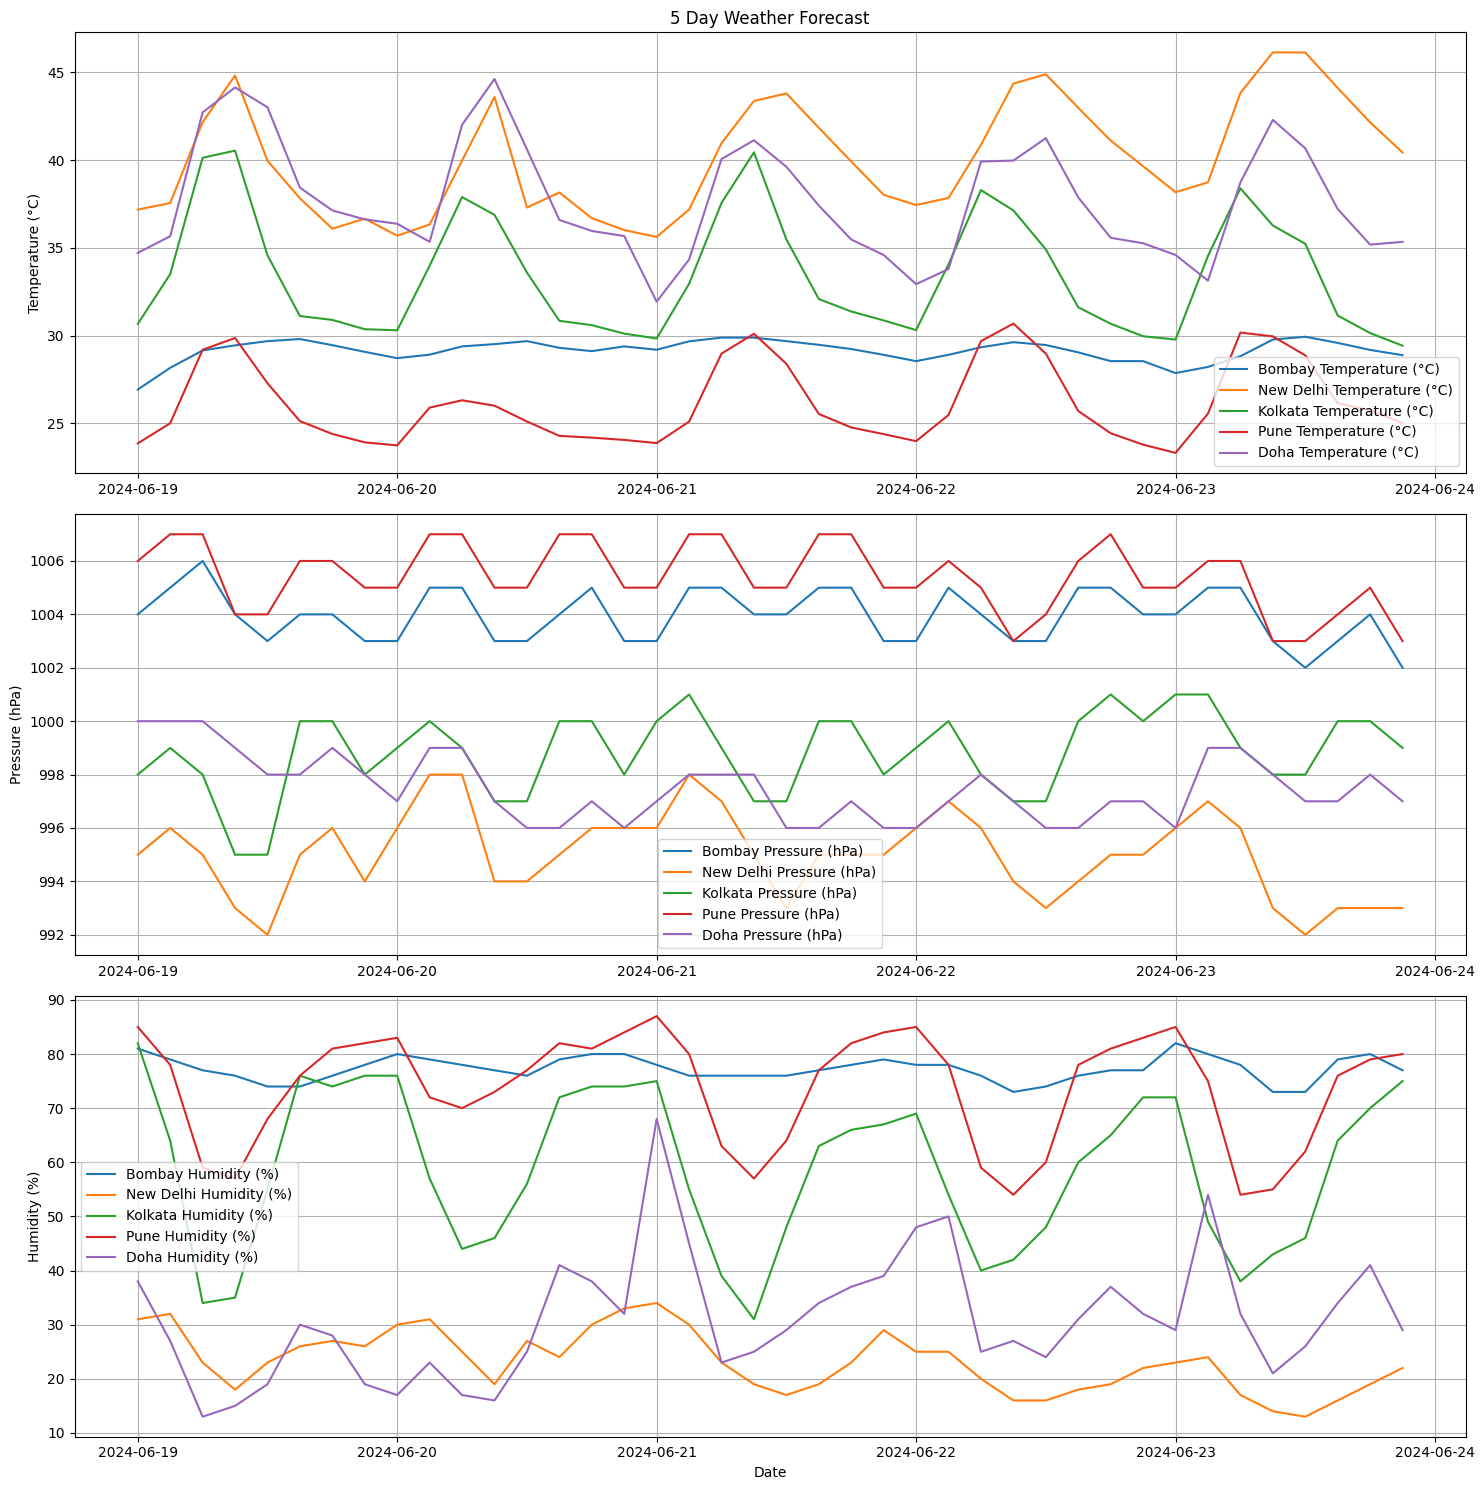

In [3]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
for city in cities:
    city_data = all_data[all_data['city'] == city]
    plt.plot(city_data['date'], city_data['temperature'], label=f'{city} Temperature (°C)')
plt.title('5 Day Weather Forecast')
plt.ylabel('Temperature (°C)')
plt.grid('True')
plt.legend()

plt.subplot(3, 1, 2)
for city in cities:
    city_data = all_data[all_data['city'] == city]
    plt.plot(city_data['date'], city_data['pressure'], label=f'{city} Pressure (hPa)')
plt.ylabel('Pressure (hPa)')
plt.grid('True')
plt.legend()

plt.subplot(3, 1, 3)
for city in cities:
    city_data = all_data[all_data['city'] == city]
    plt.plot(city_data['date'], city_data['humidity'], label=f'{city} Humidity (%)')
plt.ylabel('Humidity (%)')
plt.xlabel('Date')
plt.grid('True')
plt.legend()

plt.tight_layout()
plt.show()

### Interpretation of the 5-Day Weather Forecast for Selected Cities

#### Temperature Trends:
- **Doha**: Exhibits the highest temperature fluctuations, peaking around 45°C, indicating very hot weather.
- **New Delhi**: Shows significant temperature variation, with temperatures rising up to 40°C.
- **Kolkata**: Maintains moderate temperature variation, with peaks around 35°C.
- **Bombay** and **Pune**: Show relatively stable temperatures compared to the other cities, staying within the range of 25-35°C.

#### Pressure Trends:
- **Bombay**: Displays the highest pressure values, consistently above 1005 hPa.
- **New Delhi**: Shows slight variations but remains mostly above 1000 hPa.
- **Kolkata**, **Pune**, and **Doha**: Exhibit more stable pressure trends, with **Doha** having slightly lower values, around 992-1000 hPa.

#### Humidity Trends:
- **Bombay**: Has the highest humidity levels, consistently above 70%.
- **New Delhi**: Shows moderate humidity levels, fluctuating between 40-70%.
- **Kolkata**: Exhibits a similar trend to New Delhi but with higher peaks around 60-70%.
- **Pune** and **Doha**: Display lower humidity levels, especially Doha, which has values consistently below 30%, indicating very dry conditions.

### Summary:
- **Doha** stands out for its extreme temperatures and very low humidity, indicative of a hot desert climate.
- **Bombay** experiences high humidity and relatively high pressure, typical of a coastal city.
- **New Delhi** and **Kolkata** have noticeable temperature and humidity variations, reflecting their inland urban climates.
- **Pune** shows stable and moderate weather conditions compared to the other cities.

This analysis helps in understanding the distinct weather patterns of these cities, highlighting their climatic differences and similarities over the next five days.

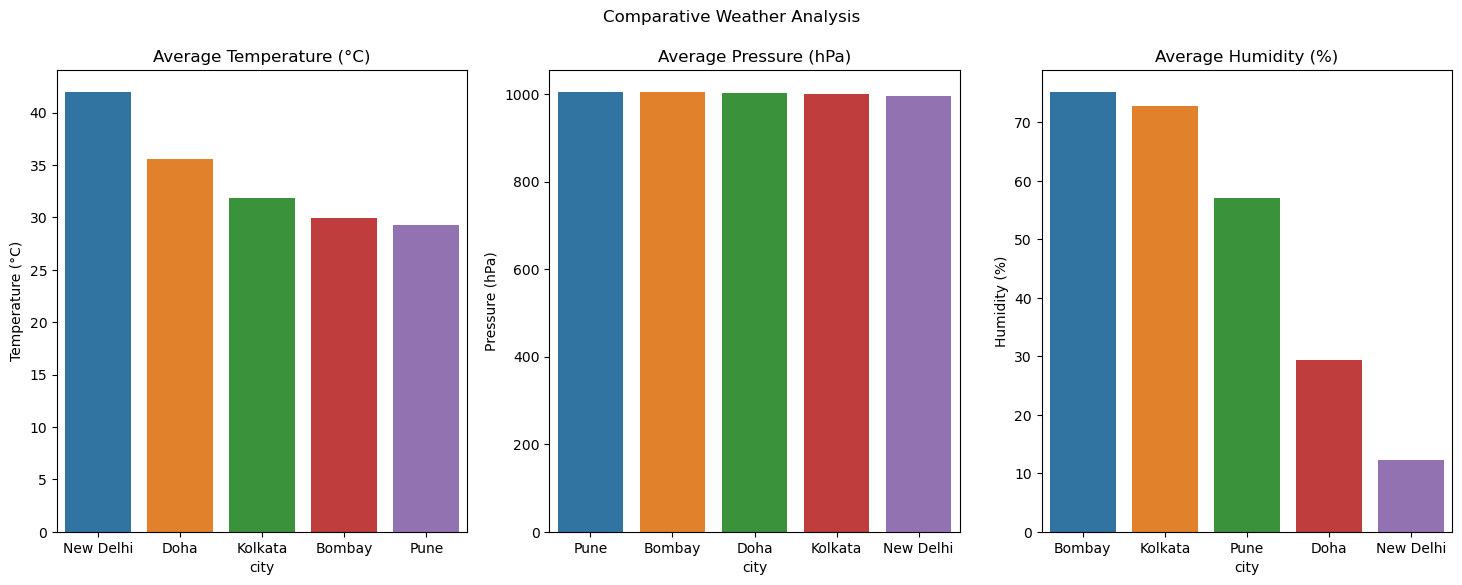

In [4]:
# Calculating average values for each city
average_data = all_data.groupby('city').mean().reset_index()

# Sorting the data in descending order for each parameter
average_data_temp = average_data.sort_values(by='temperature', ascending=False)
average_data_pressure = average_data.sort_values(by='pressure', ascending=False)
average_data_humidity = average_data.sort_values(by='humidity', ascending=False)

# Plotting comparative bar chart in descending order
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='city', y='temperature', data=average_data_temp, ax=ax[0])
ax[0].set_title('Average Temperature (°C)')
ax[0].set_ylabel('Temperature (°C)')

sns.barplot(x='city', y='pressure', data=average_data_pressure, ax=ax[1])
ax[1].set_title('Average Pressure (hPa)')
ax[1].set_ylabel('Pressure (hPa)')

sns.barplot(x='city', y='humidity', data=average_data_humidity, ax=ax[2])
ax[2].set_title('Average Humidity (%)')
ax[2].set_ylabel('Humidity (%)')

plt.suptitle('Comparative Weather Analysis')
plt.show()

### Interpretation of Comparative Weather Analysis for Selected Cities

#### Average Temperature (°C):
- **New Delhi**: Has the highest average temperature at around 40°C, indicating a very hot climate.
- **Doha**: Comes next with an average temperature close to 35°C, also indicating hot weather but slightly cooler than New Delhi.
- **Kolkata**: Has a moderate average temperature around 30°C.
- **Bombay** and **Pune**: Show similar average temperatures, slightly below 30°C, indicating relatively cooler conditions compared to New Delhi and Doha.

#### Average Pressure (hPa):
- **Pune, Bombay, Doha, Kolkata, and New Delhi**: All have similar average pressures, around 1000 hPa. This indicates stable atmospheric pressure across all these cities, with no significant differences.

#### Average Humidity (%):
- **Bombay**: Exhibits the highest average humidity at around 75%, indicating a very humid climate.
- **Kolkata**: Also shows high humidity levels close to 70%.
- **Pune**: Has moderate humidity around 55%.
- **Doha**: Shows lower humidity levels, around 25%, indicating dry conditions.
- **New Delhi**: Has the lowest average humidity, around 20%, indicating very dry conditions.

### Summary:
- **New Delhi** stands out for its extremely high average temperature and very low humidity, indicative of a hot and dry climate.
- **Doha** also has high temperatures but with slightly higher humidity than New Delhi.
- **Bombay** and **Kolkata** experience high humidity levels, typical of coastal cities, with moderate temperatures.
- **Pune** has relatively stable and moderate weather conditions.
- **Pressure** levels are consistent across all cities, indicating stable atmospheric conditions.

These insights highlight the distinct climatic characteristics of each city, providing a comparative view of their weather patterns over the next 5 days.